# **MEDICAL COST PERSONAL**

This dataset was taken from [Kaggle](https://www.kaggle.com/mirichoi0218/insurance) and contains a series of data to predict the Indivial Medical Cost billed by health insurance. 

The columns within the dataset are the following:

* *age*: age of primary beneficiary
* *sex*: insurance contractor gender, female, male
* *bmi*: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
* *children*: Number of children covered by health insurance / Number of dependents
* *smoker*: Smoking
* *region*: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
* *charges*: Individual medical costs billed by health insurance

In this notebook we aim to perform an exploratory analysis in order to describe the main caracteristics of our data and then to train and fit a Linear Regression model to predict medical costs with the highest accuracy as possible.

In [156]:
## Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## loading data
medical_cost = pd.read_csv('insurance.csv')

### **Data Exploration and Visualization**

We will perform and exploratory analysis of the dataset in order to get a previous insight before training and fitting a predictive model.

In [157]:
## fist five row
medical_cost.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [158]:
## checking columns type and missing values
medical_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The dataset is compound of 6 feature columns along with the target column (charges). There are no missing values in our dataset and for now we are going to let the column types as they are.

In [159]:
### variables statistics summary
medical_cost[['age', 'bmi', 'charges']].describe()

,age,bmi,charges
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265
std,14.049960,6.098187,12110.011237
min,18.000000,15.960000,1121.873900
25%,27.000000,26.296250,4740.287150
50%,39.000000,30.400000,9382.033000
75%,51.000000,34.693750,16639.912515
max,64.000000,53.130000,63770.428010


* The mean and the median for "age" and "bmi" columns are almost the same, pointing that the data is not skewed. For these columns the maximun values are not far away from the 75% percentile, what tells us the data may not contain outliers for these two columns. 
* In "charges" column the mean is greater than the median, indicanting that the data may be rigth skewed. The maximun value for this column is much greater than the value of the 75% percentile, so we could have outliers.

Text(0.5, 0, 'Age')

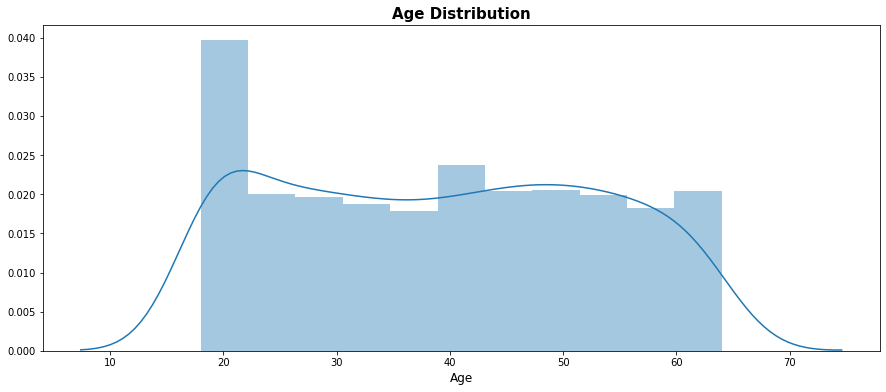

In [160]:
### Age distribution
plt.figure(figsize=(15,6))
ax = sns.distplot(a=medical_cost['age'])
ax.set_title('Age Distribution', fontsize=15, weight='bold')
ax.set_xlabel('Age', fontsize=12)

Text(0.5, 0, 'Age')

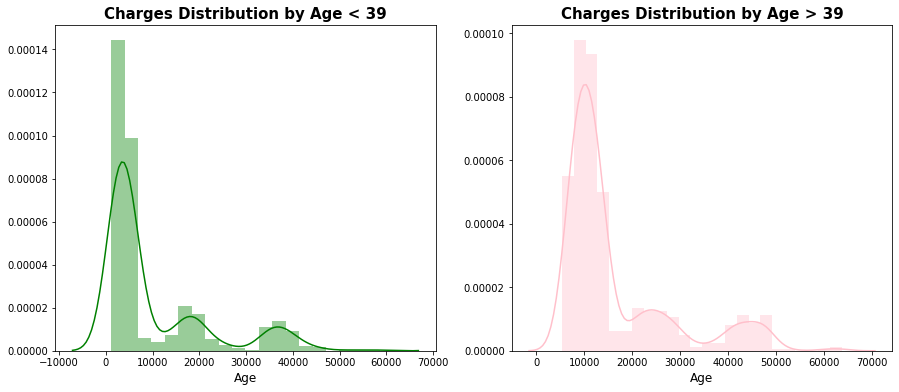

In [161]:
figs, [axes1, axes2,] = plt.subplots(1,2,figsize=(15,6))

## charges distribution age < 39
ax1 = sns.distplot(a=medical_cost[(medical_cost.age < 39)]['charges'], ax=axes1, color='green')
ax1.set_title('Charges Distribution by Age < 39', fontsize=15, weight='bold')
ax1.set_xlabel('Age', fontsize=12)

## charges distribution age > 39
ax2 = sns.distplot(a=medical_cost[(medical_cost.age > 39)]['charges'], ax=axes2, color='pink')
ax2.set_title('Charges Distribution by Age > 39', fontsize=15, weight='bold')
ax2.set_xlabel('Age', fontsize=12)

* There's a "peak" in age disribution toward 20. However, the rest of the distribution is uniform.
* People older than 39 pay a little more than younger people. Both histograms show a multimode behavior.

<Figure size 1080x432 with 0 Axes>

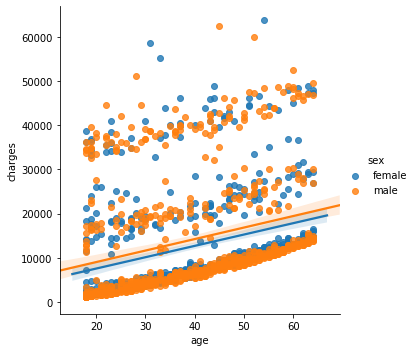

In [162]:
### age vs charges vs sex
plt.figure(figsize=(15,6))
sns.lmplot(x='age', y='charges', hue='sex', data=medical_cost)

According to the plot we could say that there's no difference in medical charges for men and women as the age is increasing. But, let's clear that with a boxplot 

Text(0, 0.5, 'Sex')

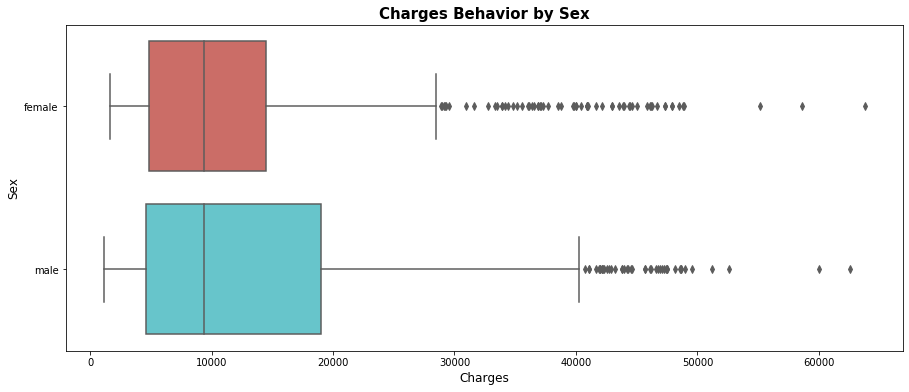

In [163]:
## charges distibution by sex
plt.figure(figsize=(15,6))
plt.title('Charges Behavior by Sex', fontsize=15, weight='bold')
sns.boxplot(x='charges', y='sex', data=medical_cost, palette='hls')
plt.xlabel('Charges', fontsize=12)
plt.ylabel('Sex', fontsize=12)

* As we stated earlier, charges column contains outliers values. 
* The median charge is the same for both men and women. 
* Men tend to spend more money in medical insurances. 

Text(0.5, 0, 'BMI')

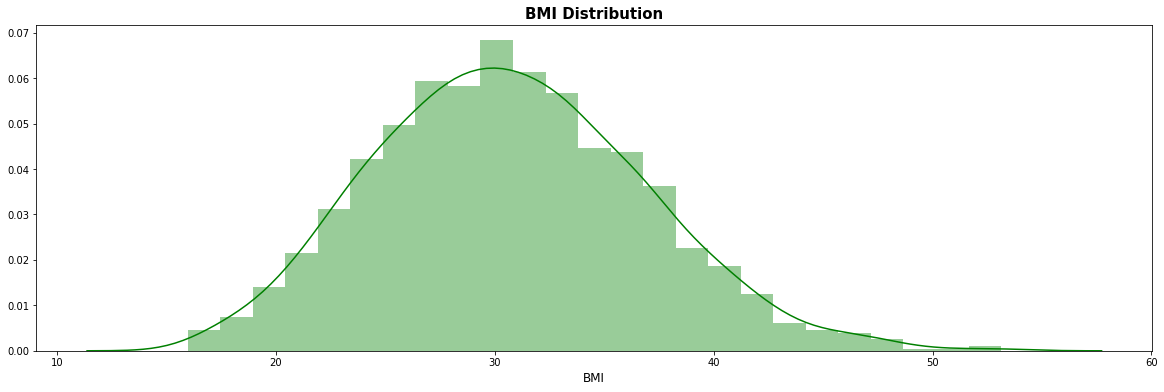

In [164]:
## bmi distribution
plt.figure(figsize=(20,6))
sns.distplot(a=medical_cost.bmi, color='green')
plt.title('BMI Distribution', fontsize=15, weight='bold')
plt.xlabel('BMI', fontsize=12)

* The BMI data shows a normal distribution with the mean value placed un 30. According to the internet, obesity starts with a BMI of 30. 
* It's interesting to see the charges behavior related to the BMI.

Text(0.5, 1.0, 'Charges Distribution by BMI > 30')

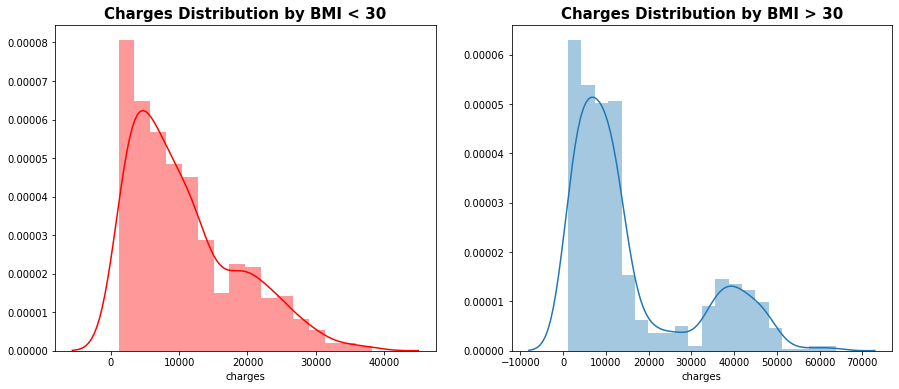

In [165]:
figs, [axes1, axes2,] = plt.subplots(1,2,figsize=(15,6))

## charges distribution BMI < 30
ax1 = sns.distplot(a=medical_cost[(medical_cost.bmi < 30)]['charges'], color='red', ax=axes1)
ax1.set_title('Charges Distribution by BMI < 30', fontsize=15, weight='bold')


## charges distribution BMI > 30
ax2 = sns.distplot(a=medical_cost[(medical_cost.bmi > 30)]['charges'], ax=axes2)
ax2.set_title('Charges Distribution by BMI > 30', fontsize=15, weight='bold')

* People with a BMI over 30 spend more money in medical insurances. 

Text(0.5, 1, 'Smoker Swarmplot')

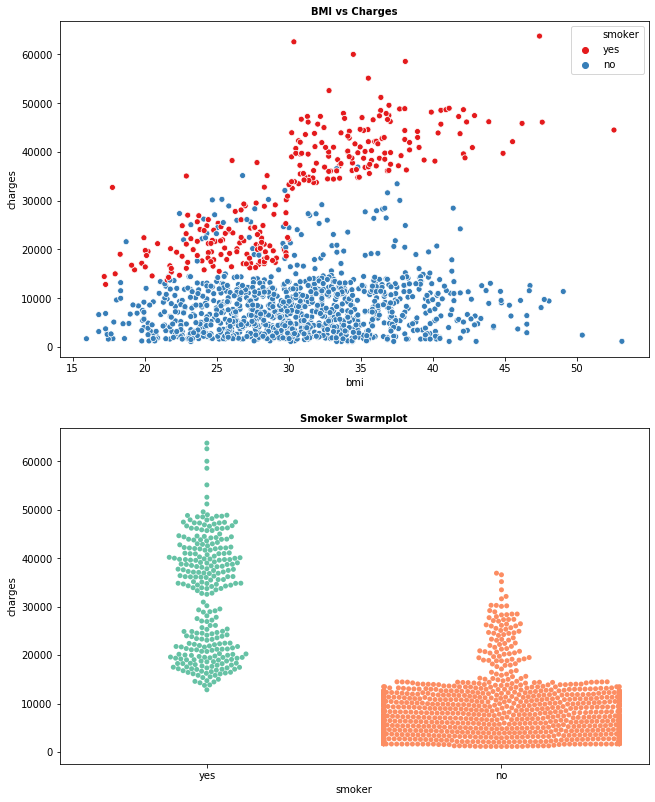

In [166]:
figs, [axes1, axes2] = plt.subplots(2,1,figsize=(10,12))
figs.tight_layout(pad=5.0)

### bmi vs charges (smoker)
ax1 = sns.scatterplot(x='bmi', y='charges', hue='smoker', data=medical_cost, palette='Set1', ax=axes1)
ax1.set_title('BMI vs Charges', fontsize=10, weight='bold')


### smoker swarmplot
ax2=sns.swarmplot(x='smoker', y='charges', data=medical_cost, palette='Set2', ax=axes2)
ax2.set_title('Smoker Swarmplot', fontsize=10, weight='bold')

* As we can see, smoker pay more for medical insurances. 
* Charges for non-smoker people tend to be low. 

C:\Users\Usuario\Anaconda3\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1080x432 with 0 Axes>

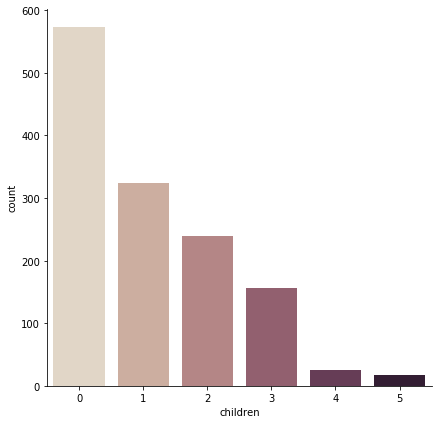

In [167]:
### CHILDREN
plt.figure(figsize=(15,6))
sns.catplot(x='children', kind='count', data=medical_cost, size=6, palette='ch:.25')


People with no children prevail in the dataset. Let's see how much money they pay. 

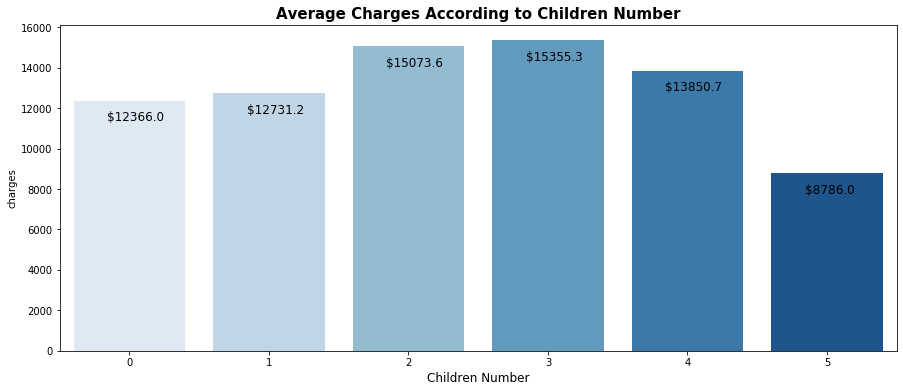

In [168]:
### Medical charges by children
plt.figure(figsize=(15,6))

table1 = medical_cost.groupby('children').mean().reset_index()
ax = sns.barplot(x='children', y='charges', data=table1, palette='Blues', ci=None)
ax.set_title('Average Charges According to Children Number', fontsize=15, weight='bold')
ax.set_xlabel('Children Number', fontsize=12)

for p in ax.patches:
     ax.annotate('${:.1f}'.format(p.get_height()), (p.get_x()+0.3*p.get_width(), p.get_height()-1000), size = 12)
        
plt.show()

Text(0, 0.5, 'Charges')

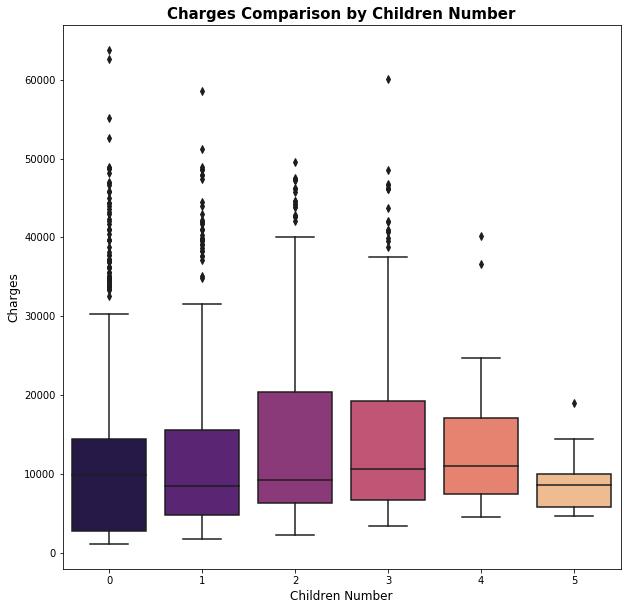

In [169]:
### boxplot
plt.figure(figsize=(10, 10))

sns.boxplot(x='children', y='charges', data=medical_cost, palette='magma')
plt.title('Charges Comparison by Children Number', fontsize=15, weight='bold')
plt.xlabel('Children Number', fontsize=12)
plt.ylabel('Charges',fontsize=12)

* People with no children spend less money in medical costs than people with up to four children.
* People with 5 children spend the least average amount of money. 
* This data is influenced by the outliers. As we see in the boxplot.

Let's see the charges behavior by region.

In [170]:
medical_cost.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

Text(0.5, 1, 'Northeast Region')

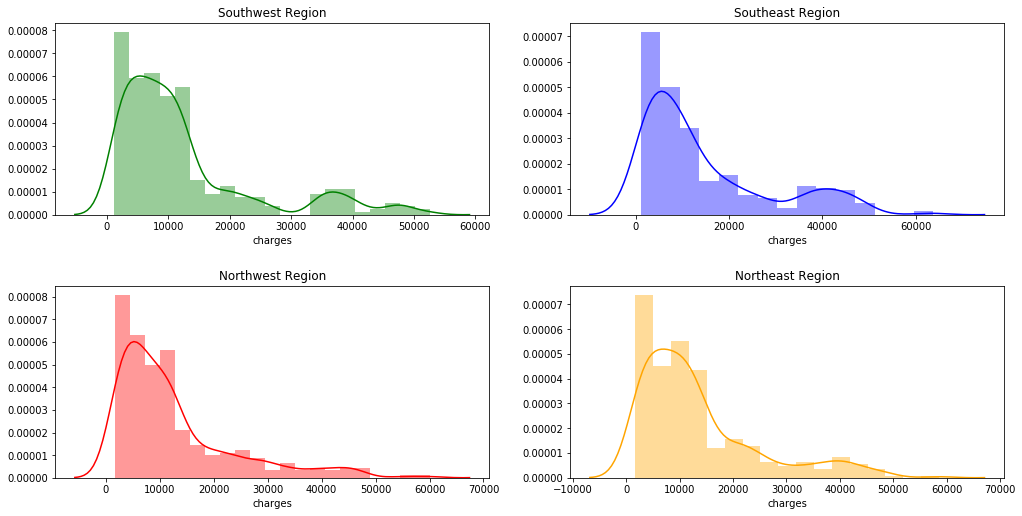

In [171]:
## region
figs, axes = plt.subplots(2,2,figsize=(15,8))
figs.tight_layout(pad=5)

## southwest
ax1 = sns.distplot(a=medical_cost[(medical_cost.region == 'southwest')]['charges'], color='green', ax=axes[0,0])
ax1.set_title('Southwest Region')

## southeast
ax2 = sns.distplot(a=medical_cost[(medical_cost.region == 'southeast')]['charges'], color='blue', ax=axes[0,1])
ax2.set_title('Southeast Region')

## northwest
ax3 = sns.distplot(a=medical_cost[(medical_cost.region == 'northwest')]['charges'], color='red', ax=axes[1,0])
ax3.set_title('Northwest Region')

## northwest
ax4 = sns.distplot(a=medical_cost[(medical_cost.region == 'northeast')]['charges'], color='orange', ax=axes[1,1])
ax4.set_title('Northeast Region')

According to the plots, there is no difference in charges paid by people into each region.

* #### **Columns Correlation**

[None, None, None]

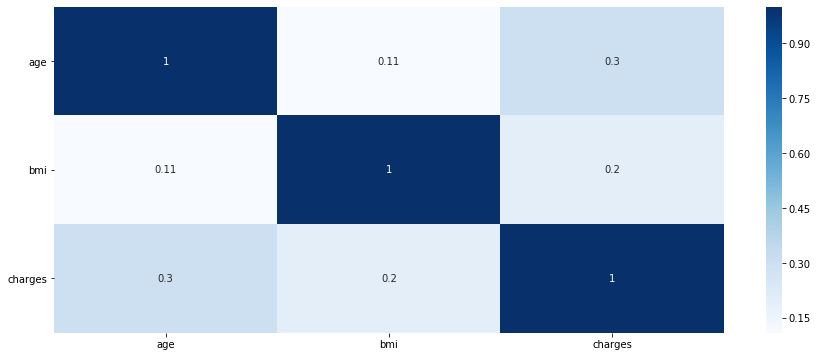

In [172]:
## correlation
data_corr = medical_cost[['age', 'bmi', 'charges']].corr()

##heatmap
plt.figure(figsize=(15,6))
ax = sns.heatmap(data_corr, annot=True, cmap='Blues')
[items.set_rotation(0) for items in ax.get_yticklabels()]

* Correlations between continuous variables and the target column are relatively low. 

### **Training and Fitting the Model**

Fist, let's convert 'object' variables to 'category'. 

In [173]:
## set category type
medical_cost = medical_cost.astype({'sex':'category', 'smoker':'category', 'region':'category'})

Now. let's use the "cat.codes" function to convert variables from category to numeric. 

In [174]:
## category to numeric
medical_cost[['sex', 'smoker', 'region']]= medical_cost[['sex', 'smoker', 'region']].apply(lambda x: x.cat.codes)

## fisrt five rows
medical_cost.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Let's import some needed libraries and separate the target column from the feature columns.

In [175]:
## libraries
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [176]:
### separating column
target = medical_cost['charges']
feature = medical_cost.drop(['charges'], axis=1)

##splitting the data into 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=0)

Now, we'll standarize de data using StandarScaler.

In [177]:
## setting the scaler
scaler = StandardScaler()

## fitting training set
X_train_std = scaler.fit_transform(X_train)

## apply transform to test set
X_test_std = scaler.transform(X_test)

Defining models and fitting to train set:

In [178]:
## Linear Regression
lr = LinearRegression()
lr.fit(X_train_std, y_train)

## Random forest
rf = RandomForestRegressor()
rf.fit(X_train_std, y_train)

C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [179]:
## score
print('Precision of {:.2f} was obtained with Linear Regression model'.format(lr.score(X_test_std, y_test)))
print('Precision of {:.2f} was obtained with Random Forest Regressor model'.format(rf.score(X_test_std, y_test)))

Precision of 0.80 was obtained with Linear Regression model
Precision of 0.84 was obtained with Random Forest Regressor model


Precision obtained with each model is not what one could expect when predicting. Let's try to improve the performance of our models.

In [180]:
### separating column
Y = medical_cost['charges']
X = medical_cost.drop(['charges'], axis=1)


## polinomial features
poly = PolynomialFeatures(degree=2)
X_poly=poly.fit_transform(X)

##splitting the data into 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.2, random_state=0)


In [181]:
## Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

## Random forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

## score
print('Precision of {:.2f} was obtained with Linear Regression model'.format(lr.score(X_test, y_test)))
print('Precision of {:.2f} was obtained with Random Forest Regressor model'.format(rf.score(X_test, y_test)))

C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Precision of 0.86 was obtained with Linear Regression model
Precision of 0.86 was obtained with Random Forest Regressor model


Using PolinomialFeature from [Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) we were able to improve the models precision when predicting charges.